In [1]:
import numpy as np
from pySingularSpectrumAnalysis import SingularSpectrumAnalysis

from statsmodels.datasets import co2
import matplotlib.pyplot as plt


data = co2.load(True).data
data = data.resample('M').mean().ffill()
data = data.values.flatten()[10:]


train, test = data[:400], data[400:]
print(train.shape, test.shape, data.shape)


model = SingularSpectrumAnalysis(L=12)
model.decompose(train)
t1, p1, r1 = model.trend_periodic_recombine()
t2, p2, r2 = model.pseudo_ofs_decompose(test)

# plt.figure(1)
# plt.plot(ssa.sigma)
# plt.figure(2)
# plt.plot(ssa.eigenvalue)
# plt.figure(3)
# plt.plot(ssa.contri)
# plt.plot(ssa.cum_contri)
# print(ssa.contri)

(400,) (116,) (516,)


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21015 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22806 missing from c

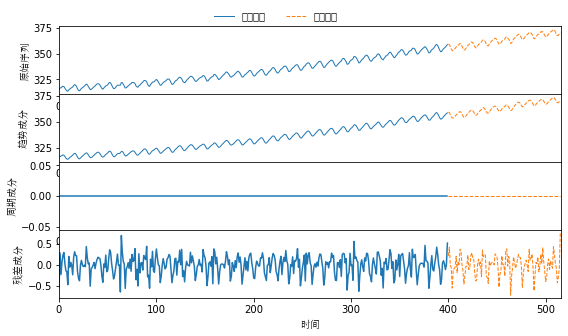

In [2]:
def PlotDecompositionResults(train, t1, p1, r1, test, t2, p2, r2):
    
    n_train = train.shape[0]
    n_test  = test.shape[0]
    n_data  = n_train + n_test
    
    fig = plt.figure(figsize = (9, 5))
    
    axes = []
    for i in range(4):
        axes.append(fig.add_subplot(411+i))
    
    x_test = range(n_train, n_data)

    for ax in axes:
        ax.set_xlim([0, n_data])

    axes[0].set_ylabel('原始序列', fontdict={'family': 'SimSun'})
    axes[0].plot(train, lw=1, label='历史序列')
    axes[0].plot(x_test, test, lw=1, ls='--', label='包外样本')
    axes[0].legend(loc=(0.3, 1.02), ncol=2, frameon=False)

    axes[1].set_ylabel('趋势成分', fontdict={'family': 'SimSun'})
    axes[1].plot(t1, lw=1)
    axes[1].plot(x_test, t2, lw=1, ls='--')

    axes[2].set_ylabel('周期成分', fontdict={'family': 'SimSun'})
    axes[2].plot(p1)
    axes[2].plot(x_test, p2, lw=1, ls='--')

    axes[3].set_ylabel('残差成分', fontdict={'family': 'SimSun'})
    axes[3].plot(r1)
    axes[3].plot(x_test, r2, lw=1, ls='--')
    axes[3].set_xlabel('时间', fontdict={'family': 'SimSun'})

#     for ax in axes:
#         ax.set_xticks(range(48, n_data, 96))
#         ax.set_xticklabels([])
#
#     axes[3].set_xticklabels([
#         '2020-9-28 \n 12:00', '', '2020-9-30 \n 12:00', '', '2020-10-2 \n 12:00',
#         '', '2020-10-6 \n 12:00', '', '2020-10-8 \n 12:00', '', 
#         '2020-10-12 \n 12:00', '', '2020-10-14 \n 12:00', '', '2020-10-16 \n 12:00',
#     ])
    
    plt.subplots_adjust(
        left    =None, 
        bottom  =None, 
        right   =None, 
        top     =None, 
        wspace  =None, 
        hspace  =0.00
    )

    # plt.savefig('plotS/PTD_{0}_K3-{1}.png'.format(sta, K3))
    
    

PlotDecompositionResults(train, t1, p1, r1, test, t2, p2, r2)